<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Luis Picón
- Nombre de alumno 2: Israel Astudillo M.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/IsraPKMNPAP/Laboratorio-de-Herramientas)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
#Codigo Aqui

In [4]:
# Carga de datos
data = pd.read_csv("energia_homero.csv")

In [5]:
data.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [6]:
col_date = pd.to_datetime(data["date"])
data['date'] = col_date
print(data.dtypes)

date          datetime64[ns]
Energy_kWh           float64
dtype: object


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [7]:
#CODIGO AQUI

In [8]:
# Generamos columnas numérica para la regresión
data['date_numeric'] = (data['date'] - data['date'].min()).dt.days
# Conjunto de entrenamiento y prueba
train_data = data[data['date'] <= '2020-02-29'].copy()
test_data = data[data['date'] >= '2020-03-01'].copy()

In [9]:
train_data.head()

,date,Energy_kWh,date_numeric
0,2016-06-01,29.691,0
1,2016-06-02,28.789,1
2,2016-06-03,19.247,2
3,2016-06-04,22.883,3
4,2016-06-05,25.195,4


In [10]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_trend = Pipeline([
    ('model', LinearRegression())
])

In [11]:
# Entrenamos
pipeline_trend.fit(train_data[['date_numeric']], train_data['Energy_kWh'])
# Predecimos
train_pred = pipeline_trend.predict(train_data[['date_numeric']])
test_pred = pipeline_trend.predict(test_data[['date_numeric']])
# Calculamos el error absoluto medio
from sklearn.metrics import mean_absolute_error
train_mae = mean_absolute_error(train_data['Energy_kWh'], train_pred)
test_mae = mean_absolute_error(test_data['Energy_kWh'], test_pred)

In [12]:
# Graficamos las predicciones
# Juntamos las predicciones
train_results = pd.DataFrame({
    'date': train_data['date'],
    'Energy_kWh_Real': train_data['Energy_kWh'],
    'Energy_kWh_Pred': train_pred
})
test_results = pd.DataFrame({
    'date': test_data['date'],
    'Energy_kWh_Real': test_data['Energy_kWh'],
    'Energy_kWh_Pred': test_pred
})

# Importamos
import plotly.graph_objs as go
# Inicializamos una figura de Plotly
fig = go.Figure()

# Añadir las trazas
# Entrenamiento real
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_results['Energy_kWh_Real'],
    mode='lines',
    name='Entrenamiento real',
    line=dict(color='blue')
))

# Entrenamiento predicho
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_results['Energy_kWh_Pred'],
    mode='lines',
    name='Entrenamiento predicho',
    line=dict(color='blue', dash='dash')
))

# Test real
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_results['Energy_kWh_Real'],
    mode='lines',
    name='Test real',
    line=dict(color='red')
))

# Test predicho
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_results['Energy_kWh_Pred'],
    mode='lines',
    name='Test predicho',
    line=dict(color='red', dash='dash')
))

# Actualizar
fig.update_layout(
    title='Comparación de Predicciones de Consumo Eléctrico (Train vs Test)',
    xaxis_title='Fecha',
    yaxis_title='Consumo de Energía (kWh)',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [13]:
# Imprimimos los errores absolutos medios
print(f'Error absoluto medio en el conjunto de entrenamiento: {train_mae}')
print(f'Error absoluto medio en el conjunto de prueba: {test_mae}')

Error absoluto medio en el conjunto de entrenamiento: 10.568154088025606
Error absoluto medio en el conjunto de prueba: 8.655813997873521


In [14]:
# Calculamos el error
train_results['Error'] = train_results['Energy_kWh_Real'] - train_results['Energy_kWh_Pred']
test_results['Error'] = test_results['Energy_kWh_Real'] - test_results['Energy_kWh_Pred']

In [15]:
# Graficamos el error

# Inicializar
fig = go.Figure()

# Añadir la traza error train
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_results['Error'],
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_results['Error'],
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig.update_layout(
    title='Error (y real - y predicho) sobre toda la data',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

Vemos que NO hay un comportamiento estacional en la serie dado que el error tiene un patrón que se repite en el tiempo y no tiene forma de ruido aleatorio que podría distribuir normal.

In [16]:
# Para hacer el ajuste de Fourier implementamos la clase entregada en clases
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

In [17]:
# Instanciamos el transformador
time_transformer = TimeTransformer(n = 4, p = 365)

In [18]:
# Pipeline
Pipeline_seasonal = Pipeline([
    ('fourier', time_transformer),
    ('regresion', LinearRegression())
])

In [19]:
# Ajustamos
Pipeline_seasonal.fit(train_data[['date']], train_data['Energy_kWh'])

Pipeline(steps=[('fourier', TimeTransformer()),
                ('regresion', LinearRegression())])

In [20]:
# Predecimos
train_pred = Pipeline_seasonal.predict(train_data[['date']])
test_pred = Pipeline_seasonal.predict(test_data[['date']])

In [21]:
# Calculamos el error absoluto
train_mae = mean_absolute_error(train_data['Energy_kWh'], train_pred)
test_mae = mean_absolute_error(test_data['Energy_kWh'], test_pred)

In [22]:
# Graficamos el ajuste nuevo con fourier

# Inicializar
fig = go.Figure()

# Entrenamiento real
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_results['Energy_kWh_Real'],
    mode='lines',
    name='Entrenamiento real',
    line=dict(color='blue')
))

# Añadir la traza predicha train
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_pred,
    mode='lines',
    name='Ajuste en train',
    line=dict(color='blue', dash='dash')
))

# Test real
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_results['Energy_kWh_Real'],
    mode='lines',
    name='Test real',
    line=dict(color='red')
))

# Añadir la traza predicha test
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_pred,
    mode='lines',
    name='Ajuste en test',
    line=dict(color='red', dash='dash')
))
# Actualizar
fig.update_layout(
    title='Ajuste con transformada de Fourier',
    xaxis_title='Fecha',
    yaxis_title='kWh de energía',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [23]:
# Mostramos los MAEs
print(f'Error absoluto medio en el conjunto de entrenamiento: {train_mae}')
print(f'Error absoluto medio en el conjunto de prueba: {test_mae}')

Error absoluto medio en el conjunto de entrenamiento: 5.345588745161719
Error absoluto medio en el conjunto de prueba: 4.457477760410813


Encontramos que los errores medios son bastante menores a los encontrados anteriormente.

In [24]:
# Calculamos el error nuevo
train_error = train_data['Energy_kWh'] - train_pred
test_error = test_data['Energy_kWh'] - test_pred

In [25]:
# Graficamos el error nuevamente

# Inicializar
fig = go.Figure()

# Añadir la traza error train
fig.add_trace(go.Scatter(
    x=train_results['date'],
    y=train_error,
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig.add_trace(go.Scatter(
    x=test_results['date'],
    y=test_error,
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig.update_layout(
    title='Error (y real - y predicho) sobre toda la data con Fourier',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

Notamos que los patrones vistos anteriormente ya no están presentes y el error parece oscilar con un rango constante con respecto al 0, por lo cual decimos que su error es estacionario. Sin embargo, notamos que los errores aumentan en los períodos donde hay peaks de consumo.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [26]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [27]:
#CODIGO AQUI

In [28]:
# Generamos columnas numérica para la regresión
data['date_numeric'] = (data['date'] - data['date'].min()).dt.days
# Conjunto de entrenamiento y prueba
train_data = data[data['date'] <= '2020-02-29'].copy()
test_data = data[data['date'] >= '2020-03-01'].copy()

In [29]:
# Renombramos y sacamos las columnas sobrantes
train_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'}, inplace=True)
test_data.rename(columns={'date': 'ds', 'Energy_kWh': 'y'}, inplace=True)
train_data.drop(columns=['date_numeric'], inplace=True)
test_data.drop(columns=['date_numeric'], inplace=True)

In [30]:
# Instanciamos el modelo
m = Prophet()
# Fiteamos
m.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/v9qmzhiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/dcd3haky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39067', 'data', 'file=/tmp/tmpd1n3wyii/v9qmzhiq.json', 'init=/tmp/tmpd1n3wyii/dcd3haky.json', 'output', 'file=/tmp/tmpd1n3wyii/prophet_modeli70svpf3/prophet_model-20241021013219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:32:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# Períodos a extender hacia el futuro
print(len(test_data))

129


In [32]:
# Períodos futuros comparables a test
future = m.make_future_dataframe(periods=129)
# Forecast
forecast = m.predict(future)

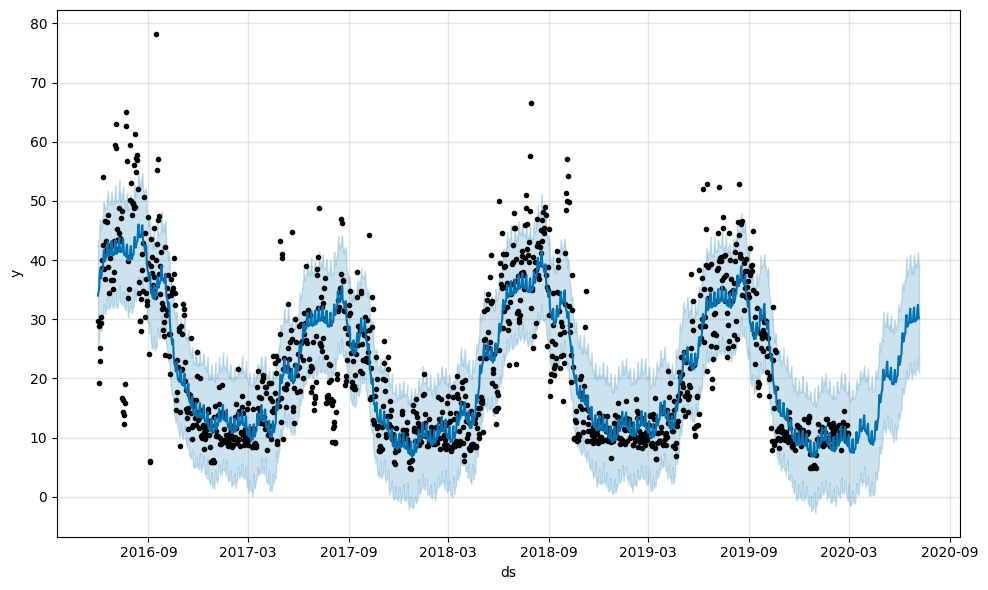

In [33]:
fig1 = m.plot(forecast)

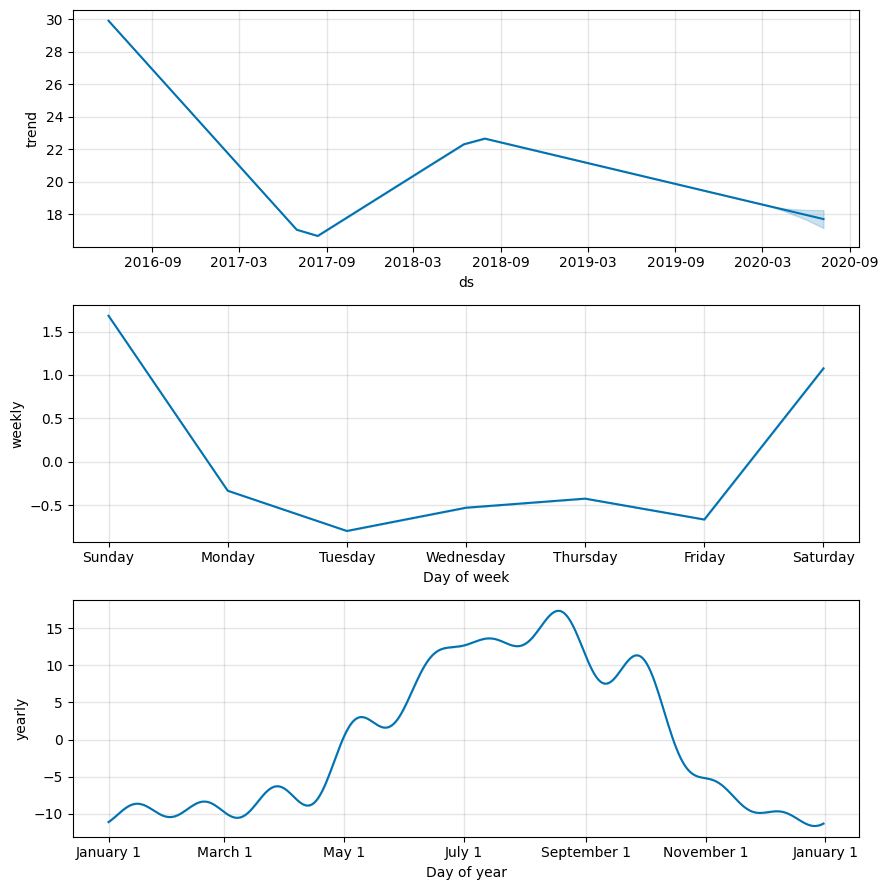

In [34]:
fig2 = m.plot_components(forecast)

In [35]:
# Calculamos los MAE
mae_train = mean_absolute_error(train_data['y'], forecast[forecast['ds'].isin(train_data['ds'])]['yhat'])
mae_test = mean_absolute_error(test_data['y'], forecast[forecast['ds'].isin(test_data['ds'])]['yhat'])

In [36]:
# Imprimimos MAEs
print(f'Error absoluto medio en el conjunto de entrenamiento: {mae_train}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_test}')

Error absoluto medio en el conjunto de entrenamiento: 4.817481017717443
Error absoluto medio en el conjunto de prueba: 4.921079315201517


In [37]:
# Error observado
train_error_ = train_data['y'] - forecast[forecast['ds'].isin(train_data['ds'])]['yhat']
test_error_ = test_data['y'] - forecast[forecast['ds'].isin(test_data['ds'])]['yhat']

In [38]:
# Error graficado en el tiempo

# Inicializar
fig_ = go.Figure()

# Añadir la traza error train
fig_.add_trace(go.Scatter(
    x=train_data['ds'],
    y=train_error_,
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig_.add_trace(go.Scatter(
    x=test_data['ds'],
    y=test_error_,
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig_.update_layout(
    title='Error (y real - y predicho) sobre toda la data con Prophet',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig_.show()

Podemos apreciar un comportamiento no estacional dado que hay comportamientos repetidos o que sigen un patrón que es el aumento del error en los peaks de consumo eléctrico o ciclos. La media parece estar en 0 y la variación respecto a esta media parece ser no constante entre períodos de consumo peak y períodos de menor consumo.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [39]:
#CODIGO AQUI

In [40]:
data_2 = pd.read_csv("datos_frink.csv")

In [41]:
# Convertimos a date time
data_2['date'] = pd.to_datetime(data_2['date'])

In [42]:
# Columnas exógenas
columns_exo = data_2.columns.tolist()[1:]
columns_exo

['Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min']

In [43]:
data_2.head()

,date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7


In [44]:
# Generamos columnas numérica para la regresión
data['date_numeric'] = (data['date'] - data['date'].min()).dt.days

In [45]:
data.head()

,date,Energy_kWh,date_numeric
0,2016-06-01,29.691,0
1,2016-06-02,28.789,1
2,2016-06-03,19.247,2
3,2016-06-04,22.883,3
4,2016-06-05,25.195,4


In [46]:
# Merge
data = data.merge(data_2, on='date', how='left')

In [47]:
# Nueva columna ds e y
data['ds'] = data['date']
data['y'] = data['Energy_kWh']

In [48]:
# Conjunto de entrenamiento y prueba
train_data = data[data['date'] <= '2020-02-29'].copy()
test_data = data[data['date'] >= '2020-03-01'].copy()

In [49]:
# Prophet con variables exógenas

# Instanciamos el modelo
m = Prophet()
# Variables exógenas
for col in columns_exo:
    m.add_regressor(col)
# Fiteamos
m.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/g2kd0g_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/x5edjzs1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68516', 'data', 'file=/tmp/tmpd1n3wyii/g2kd0g_n.json', 'init=/tmp/tmpd1n3wyii/x5edjzs1.json', 'output', 'file=/tmp/tmpd1n3wyii/prophet_modeli_iphzve/prophet_model-20241021013222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
# Proyección al futuro
future = m.make_future_dataframe(periods=129)

In [51]:
# Future con variables exógenas
future = future.merge(data[columns_exo + ['ds']], on='ds', how='left')

In [52]:
# Predecir
forecast = m.predict(future)

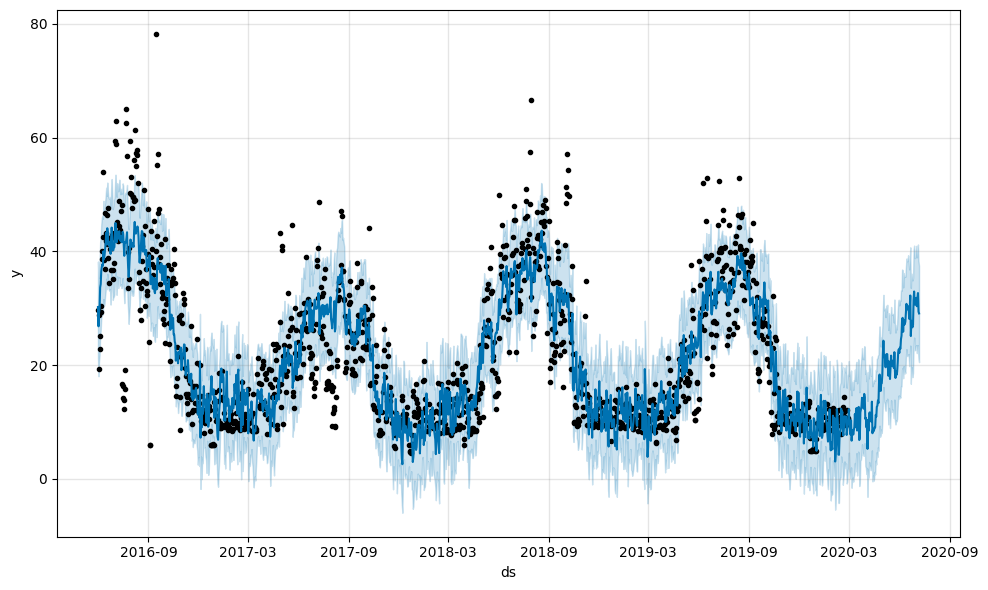

In [53]:
fig1 = m.plot(forecast)

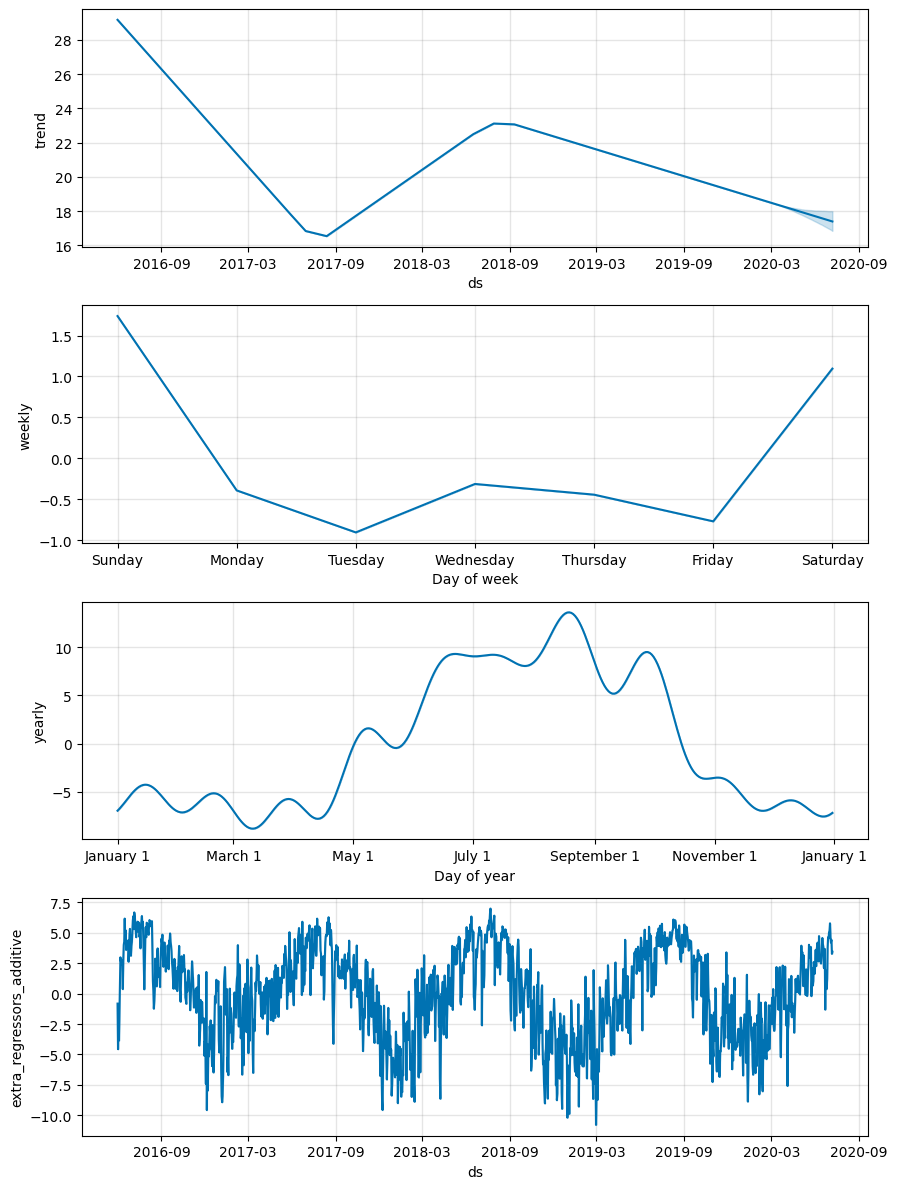

In [54]:
fig2 = m.plot_components(forecast)

In [55]:
# Calculamos el MAE
mae_train = mean_absolute_error(train_data['y'], forecast[forecast['ds'].isin(train_data['ds'])]['yhat'])
mae_test = mean_absolute_error(test_data['y'], forecast[forecast['ds'].isin(test_data['ds'])]['yhat'])

In [56]:
# Imprimimos el MAE
print(f'Error absoluto medio en el conjunto de entrenamiento: {mae_train}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_test}')

Error absoluto medio en el conjunto de entrenamiento: 4.6691750600244
Error absoluto medio en el conjunto de prueba: 4.482934539953145


Vemos que el error disminuye marginalmente respecto al obtenido con el ajuste de Fourier. Llama la atención que el error de test sea menor que el de train, esto puede deberse a la cantidad mucho menor de datos en test, que podría implicar menor error por ocurrencias de menor varianza en el conjunto real de test.

In [57]:
# Calculamos laa diferencia entre la predicción y el estimado
train_error_ = train_data['y'] - forecast[forecast['ds'].isin(train_data['ds'])]['yhat']
test_error_ = test_data['y'] - forecast[forecast['ds'].isin(test_data['ds'])]['yhat']

In [58]:
# Error graficado en el tiempo

# Inicializar
fig_ = go.Figure()

# Añadir la traza error train
fig_.add_trace(go.Scatter(
    x=train_data['ds'],
    y=train_error_,
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig_.add_trace(go.Scatter(
    x=test_data['ds'],
    y=test_error_,
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig_.update_layout(
    title='Error (y real - y predicho) sobre toda la data con Prophet',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig_.show()

Vemos que la serie si tiene un comportamiento estacional dado que la varianza y la media parecen mantenerse constantes en el tiempo, en específico con la media respecto al 0. Sin embargo, ahora vemos que hay variaciones que desaparecieron del error respecto al análisis anterior que seguían un patrón temporal o dependiente de los períodos de peaks. Sin emabrgo, la perturbación inicial sigue presente.
En base a esto y que el error absoluto medio disminuye, podemos decir que las variables incorporadas si explican algo del consumo energético, sin emabrgo no sabemos como este efecto se distribuye entre las variables, podría ser por ejemplo que todo el efecto esté concentrado en una sola variable y el resto no aporte a explicar el consumo.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [59]:
#CODIGO AQUI

In [60]:
train_data.columns.tolist()

['date',
 'Energy_kWh',
 'date_numeric',
 'Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min',
 'ds',
 'y']

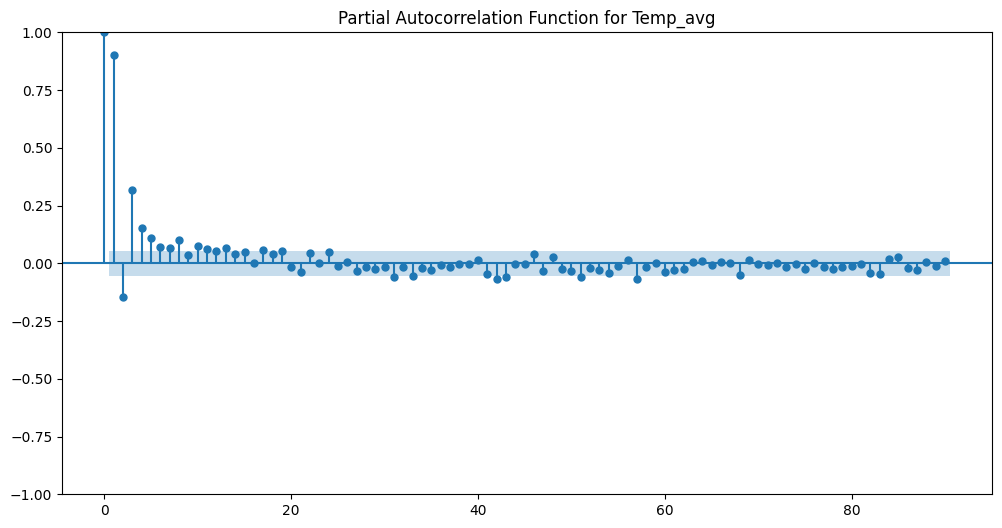

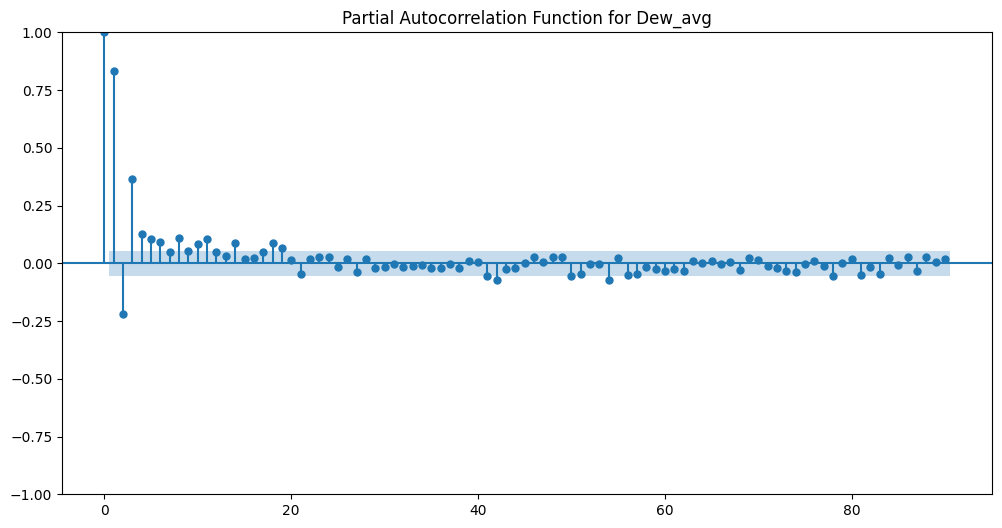

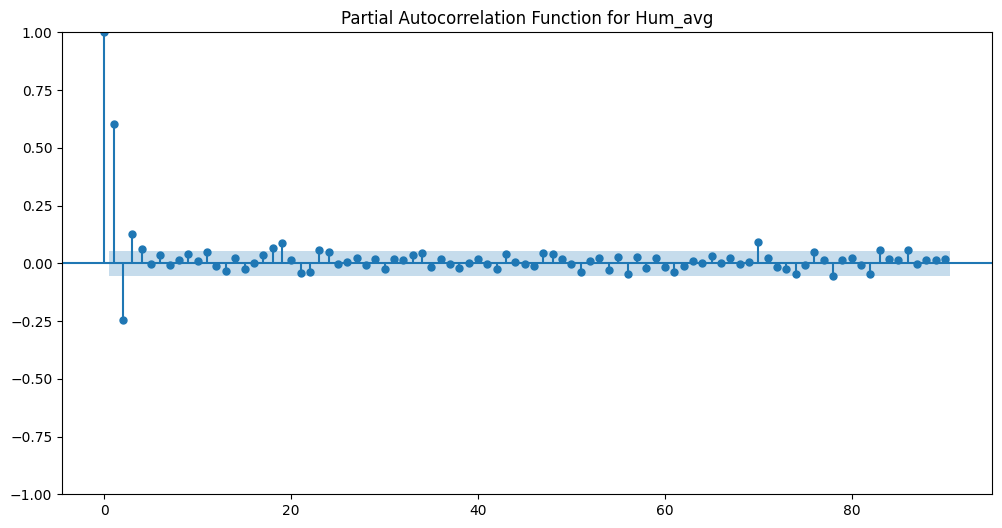

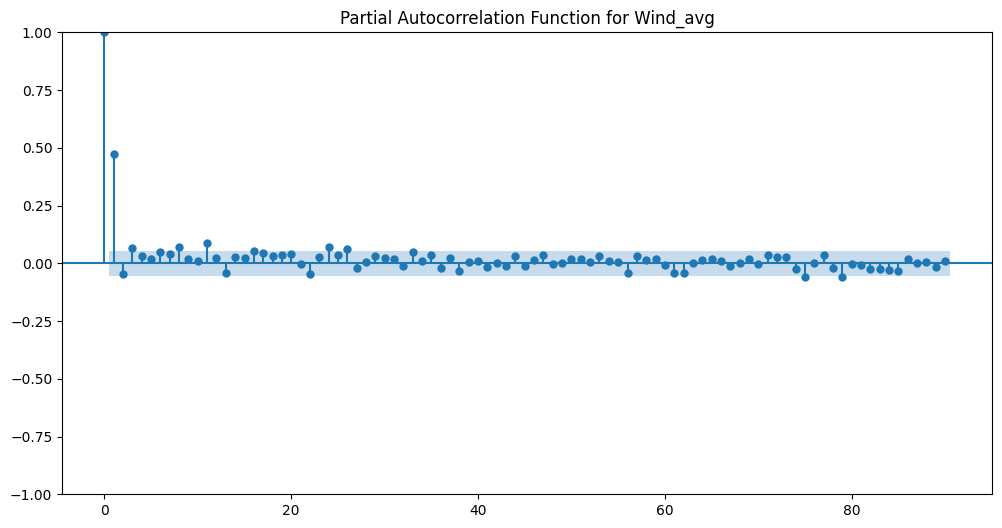

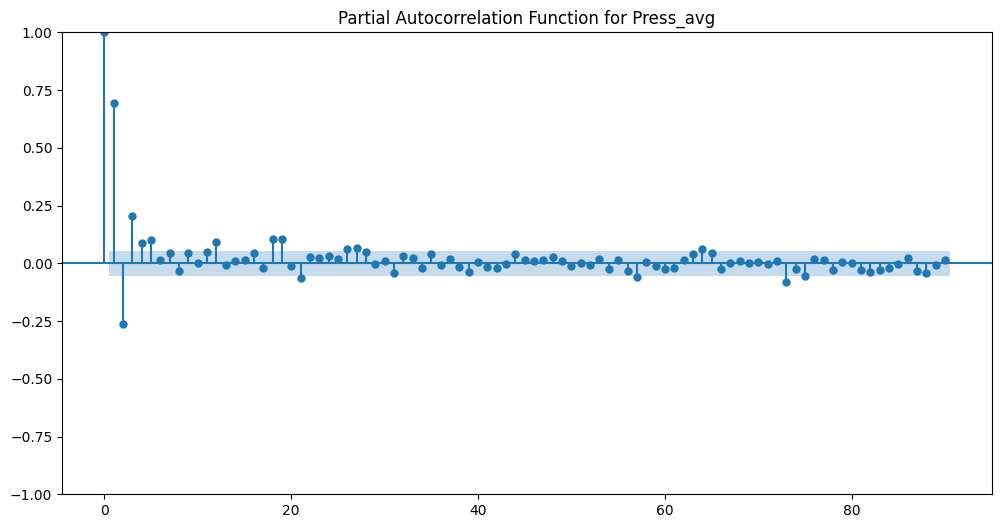

In [61]:
# Autocorrelación
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Filtrar las columnas que incluyen 'avg' en su nombre
avg_columns = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

# Iterar sobre las columnas filtradas para graficar la autocorrelación parcial de cada una
for col in avg_columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(train_data[col], lags=90, alpha=0.05, ax=ax)  # 5% de significancia
    plt.title(f'Partial Autocorrelation Function for {col}')
    plt.show()


Para las variables avg los lags relevantes encontrados:
- Temp_avg es 1 período relevante de lag.
- Dew_avg es 1 período relevante de lag.
- Hum_avg es 1 período relevante de lag.
- Wind_avg es 1 período relevante de lag, aunque la auto correlación es menor a 0.5.
- Press_avg es 1 período relevante de lag.

Podemos decir que todas las variables tienen un período hacia atrás relevante que explica su valor actual.

In [62]:
# Incorporamos los lags al dataset de train y test
for col in avg_columns:
    train_data[f'{col}_lag'] = train_data[col].shift(1) # 1 shift para todas las columnas
    test_data[f'{col}_lag'] = test_data[col].shift(1)

In [63]:
print(train_data.head())
print(test_data.head())

        date  Energy_kWh  date_numeric  Temp_max  Temp_avg  Temp_min  Dew_max  \
0 2016-06-01      29.691             0        85      74.8        68       74   
1 2016-06-02      28.789             1        76      71.2        66       74   
2 2016-06-03      19.247             2        79      72.1        68       72   
3 2016-06-04      22.883             3        76      71.2        69       73   
4 2016-06-05      25.195             4        82      73.8        68       72   

   Dew_avg  Dew_min  Hum_max  ...  Press_max  Press_avg  Press_min         ds  \
0     71.4       66      100  ...       29.8       29.8       29.7 2016-06-01   
1     70.3       66      100  ...       29.8       29.8       29.7 2016-06-02   
2     70.0       68      100  ...       29.8       29.8       29.7 2016-06-03   
3     70.0       66      100  ...       29.8       29.7       29.7 2016-06-04   
4     70.0       68      100  ...       29.7       29.7       29.7 2016-06-05   

        y  Temp_avg_lag  D

Vemos los nulos en las columnas nuevas creadas.

In [64]:
# Inputamos con pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Definimos las columnas con valores nulos
avg_columns = ['Temp_avg_lag', 'Dew_avg_lag', 'Hum_avg_lag', 'Wind_avg_lag', 'Press_avg_lag']
# Creamos el imputer
imputer = SimpleImputer(strategy='mean')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', imputer, avg_columns)
    ],
    remainder='passthrough'
)

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
train_data_transformed = pipeline.fit_transform(train_data)

# Imputar en los datos de test
test_data_transformed = pipeline.transform(test_data)

# Columnas en nuevo orden
columns_transformed = avg_columns + [col for col in train_data.columns if col not in avg_columns]

# Convertir a dataframe
train_data_transformed = pd.DataFrame(train_data_transformed, columns=columns_transformed)
test_data_transformed = pd.DataFrame(test_data_transformed, columns=columns_transformed)

In [65]:
print(train_data_transformed.isna().sum())
print(test_data_transformed.isna().sum())

Temp_avg_lag     0
Dew_avg_lag      0
Hum_avg_lag      0
Wind_avg_lag     0
Press_avg_lag    0
date             0
Energy_kWh       0
date_numeric     0
Temp_max         0
Temp_avg         0
Temp_min         0
Dew_max          0
Dew_avg          0
Dew_min          0
Hum_max          0
Hum_avg          0
Hum_min          0
Wind_max         0
Wind_avg         0
Wind_min         0
Press_max        0
Press_avg        0
Press_min        0
ds               0
y                0
dtype: int64
Temp_avg_lag     0
Dew_avg_lag      0
Hum_avg_lag      0
Wind_avg_lag     0
Press_avg_lag    0
date             0
Energy_kWh       0
date_numeric     0
Temp_max         0
Temp_avg         0
Temp_min         0
Dew_max          0
Dew_avg          0
Dew_min          0
Hum_max          0
Hum_avg          0
Hum_min          0
Wind_max         0
Wind_avg         0
Wind_min         0
Press_max        0
Press_avg        0
Press_min        0
ds               0
y                0
dtype: int64


Los nulos ya no están presentes.

In [66]:
# Creamos el modelo de Prophet
m = Prophet()
# Columnas con variables exógenas a incluir
ex_cols = [col for col in train_data_transformed.columns.tolist() if col not in ['ds', 'y','Energy_kWh','date','date_numeric']]
# Variables exógenas
for col in ex_cols:
    m.add_regressor(col)
# Fiteamos
m.fit(train_data_transformed)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/q45u8k1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1n3wyii/f8kz4y2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53765', 'data', 'file=/tmp/tmpd1n3wyii/q45u8k1s.json', 'init=/tmp/tmpd1n3wyii/f8kz4y2b.json', 'output', 'file=/tmp/tmpd1n3wyii/prophet_modelouypn09f/prophet_model-20241021013229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
# Proyección al futuro
future = m.make_future_dataframe(periods=129)

In [68]:
# Generamos el datset completo
data_exo = pd.concat([train_data_transformed, test_data_transformed], axis=0)
# Verificamos que las fechas estén en orden
data_exo = data_exo.sort_values(by='ds')
# Reiniciar el índice si es necesario
data_exo.reset_index(drop=True, inplace=True)

In [69]:
# Future con variables exógenas y lags
future = future.merge(data_exo[ex_cols+['ds']], on='ds', how='left')

In [70]:
# Predecir
forecast = m.predict(future)

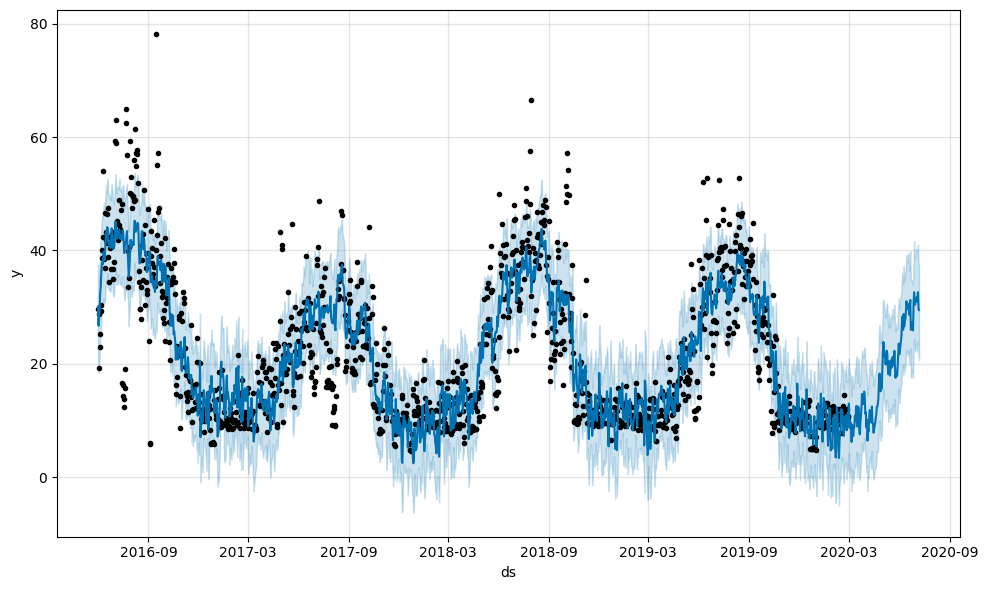

In [71]:
fig1 = m.plot(forecast)

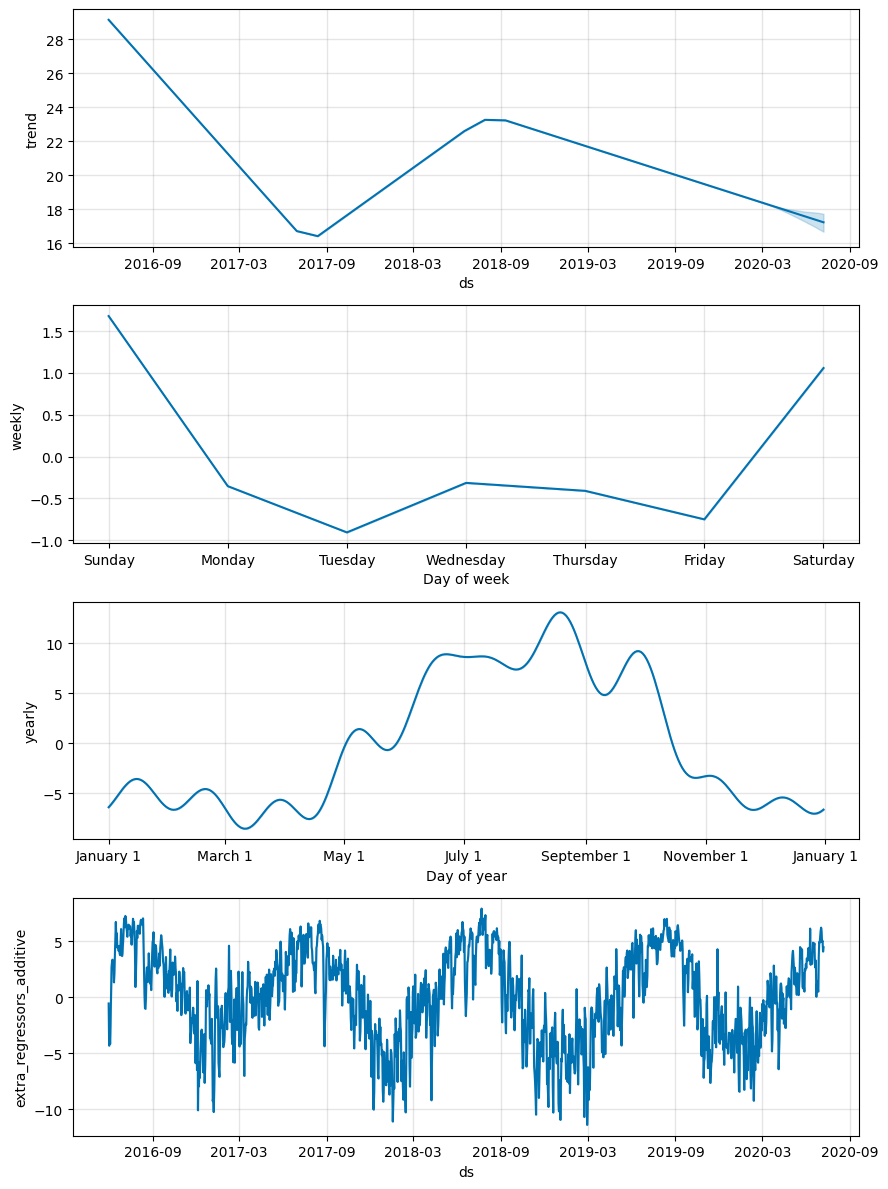

In [72]:
fig2 = m.plot_components(forecast)

In [73]:
# Calculamos el MAE en train y en test
mae_train = mean_absolute_error(train_data_transformed['y'], forecast[forecast['ds'].isin(train_data_transformed['ds'])]['yhat'])
mae_test = mean_absolute_error(test_data_transformed['y'], forecast[forecast['ds'].isin(test_data_transformed['ds'])]['yhat'])

In [74]:
# Imprimimos
print(f'Error absoluto medio en el conjunto de entrenamiento: {mae_train}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_test}')

Error absoluto medio en el conjunto de entrenamiento: 4.614307308428178
Error absoluto medio en el conjunto de prueba: 4.4247609441897975


Podemos ver que el error absoluto medio disminuyó respecto a la iteración sin lags en un margen bastante pequeño de magnitud en las centésimas. Sin emabrgo, dado que el error disminuye podemos decir que los lags si incluyen explicabilidad en la variable dependiente o consumo eléctrico de Homero.

In [75]:
# Graficamos como hicimos anteriormente para train y test el error y real - y predicho
# Calculamos laa diferencia entre la predicción y el estimado
train_error_ = train_data['y'] - forecast[forecast['ds'].isin(train_data['ds'])]['yhat']
test_error_ = test_data['y'] - forecast[forecast['ds'].isin(test_data['ds'])]['yhat']

In [76]:
# Error graficado en el tiempo

# Inicializar
fig_ = go.Figure()

# Añadir la traza error train
fig_.add_trace(go.Scatter(
    x=train_data['ds'],
    y=train_error_,
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig_.add_trace(go.Scatter(
    x=test_data['ds'],
    y=test_error_,
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig_.update_layout(
    title='Error (y real - y predicho) sobre toda la data con Prophet, variables exógenas y lags.',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig_.show()

Dado que la varianza y la media parecen mantenerse constantes en el tiempo y no hay patrones que dependan del tiempo que observemos en el error, podemos decir que el error es estacional. Sin emabrgo, incluir los lags no aportó mucha variación respecto al caso sin lags más allá de la ligera disminución del error absoluto medio que se observó. El comportamiento del error en el gráfico no cambio sustancialmente de comportamiento. Sin emabrgo, esto hace sentido dado que no se está incorporando información nueva al modelo, solo lags que tienen alta correlación con los valores de las medias de las variables estudiadas.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [77]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [78]:
#CODIGO AQUI

In [79]:
# Grilla con parámetros a modificar
grid = {'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
         'seasonality_prior_scale': [0.01, 0.1, 0.5, 1],
         'seasonality_mode': ['additive', 'multiplicative'],
         'changepoint_range': [0.8, 0.9]}

In [80]:
# Optimizamos
tuning_results, best_params = optimize_prophet(train_data_transformed, test_data_transformed, ex_cols, grid)

Tuning Prophet parameters: 100%|██████████| 64/64 [01:11<00:00,  1.11s/it]


In [81]:
print(tuning_results)
print(best_params)

    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                     0.001                     0.01         additive   
1                     0.001                     0.01         additive   
22                    0.010                     0.10   multiplicative   
17                    0.010                     0.01         additive   
23                    0.010                     0.10   multiplicative   
..                      ...                      ...              ...   
51                    0.500                     0.01   multiplicative   
54                    0.500                     0.10   multiplicative   
55                    0.500                     0.10   multiplicative   
63                    0.500                     1.00   multiplicative   
59                    0.500                     0.50   multiplicative   

    changepoint_range       MAEs  
0                 0.8   3.919070  
1                 0.9   3.949472  
22                

In [82]:
# Creamos el modelo de prophet con los parámetros encontrados
m = Prophet(**best_params)
# Variables exógenas
for col in ex_cols:
    m.add_regressor(col)
# Fiteamos
m.fit(train_data_transformed)

In [83]:
# Proyección al futuro
future = m.make_future_dataframe(periods=129)

In [84]:
# Future con variables exógenas y lags
future = future.merge(data_exo[ex_cols+['ds']], on='ds', how='left')

In [85]:
# Predecir
forecast = m.predict(future)

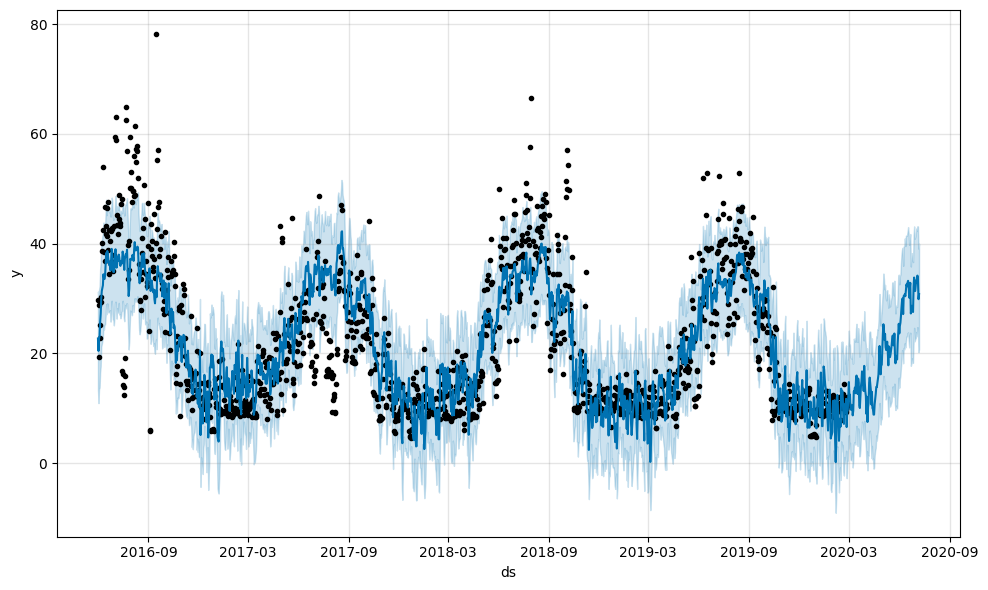

In [86]:
fig1 = m.plot(forecast)

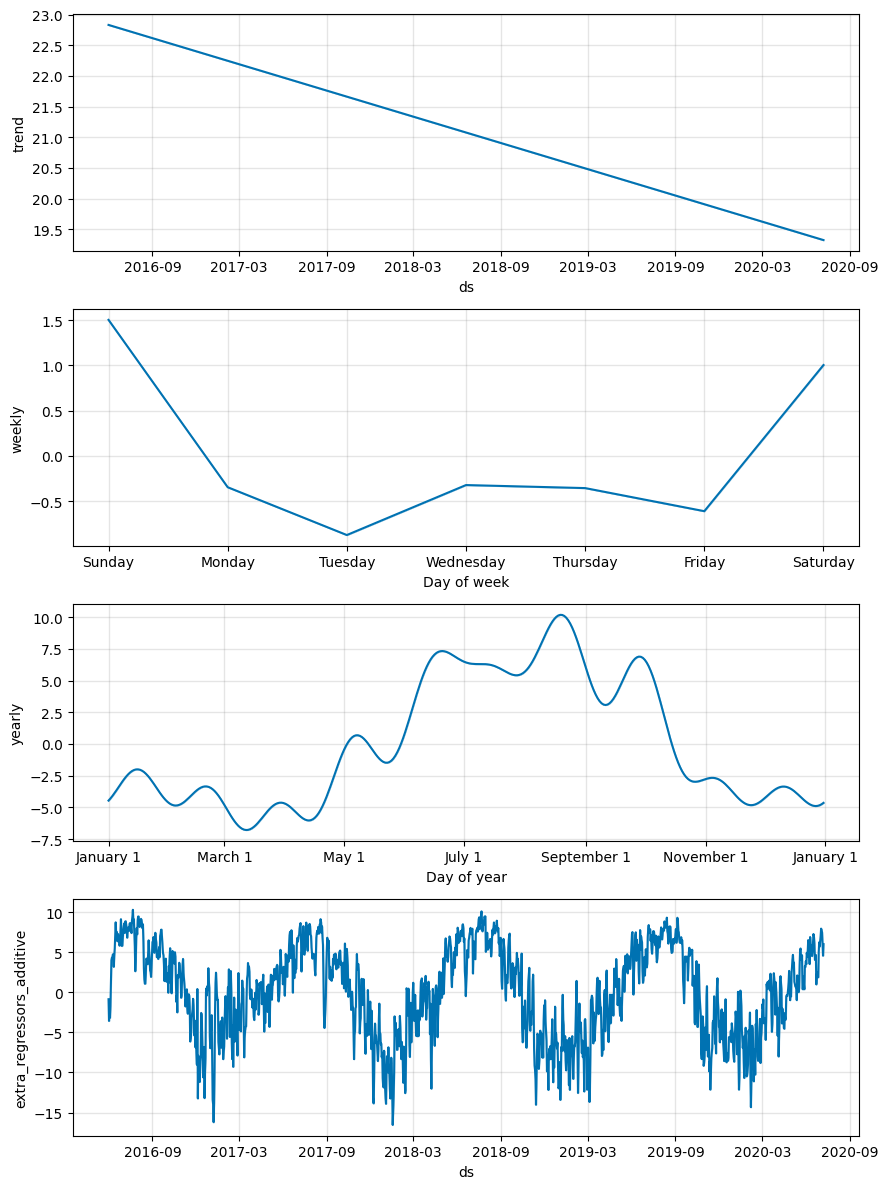

In [87]:
fig2 = m.plot_components(forecast)

In [88]:
# Calculamos el MAE en train y en test
mae_train = mean_absolute_error(train_data_transformed['y'], forecast[forecast['ds'].isin(train_data_transformed['ds'])]['yhat'])
mae_test = mean_absolute_error(test_data_transformed['y'], forecast[forecast['ds'].isin(test_data_transformed['ds'])]['yhat'])

In [89]:
# Imprimimos
print(f'Error absoluto medio en el conjunto de entrenamiento: {mae_train}')
print(f'Error absoluto medio en el conjunto de prueba: {mae_test}')

Error absoluto medio en el conjunto de entrenamiento: 5.239037227077068
Error absoluto medio en el conjunto de prueba: 3.919070258448321


Vemos que el error en test es el encontrado por la optimización de hiperparámetros. Sin embargo, el error en train aumentó lo cual podría ser perjudicial para el poder de generalización del modelo, dado que precisamente se optimizaron los parámetros sobre el conjunto de test.

In [90]:
# Graficamos como hicimos anteriormente para train y test el error y real - y predicho
# Calculamos laa diferencia entre la predicción y el estimado
train_error_ = train_data['y'] - forecast[forecast['ds'].isin(train_data['ds'])]['yhat']
test_error_ = test_data['y'] - forecast[forecast['ds'].isin(test_data['ds'])]['yhat']

In [91]:
# Error graficado en el tiempo

# Inicializar
fig_ = go.Figure()

# Añadir la traza error train
fig_.add_trace(go.Scatter(
    x=train_data['ds'],
    y=train_error_,
    mode='lines',
    name='Error train',
    line=dict(color='blue')
))
# Añadir la traza error test
fig_.add_trace(go.Scatter(
    x=test_data['ds'],
    y=test_error_,
    mode='lines',
    name='Error test',
    line=dict(color='red')
))
# Actualizar
fig_.update_layout(
    title='Error (y real - y predicho) sobre toda la data con Prophet, variables exógenas y lags.',
    xaxis_title='Fecha',
    yaxis_title='Error',
    legend_title='Conjunto de Datos',
    template='plotly_white'
)

# Mostrar el gráfico
fig_.show()

No se ve un cambio sustancial respecto a los resultados anteriores, el error sigue pareciendo estacionario dada la varianza y media que se mantiene aproximadamente constante.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [92]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357284 sha256=1b47fca912a2771c4f9c7e9f21cbf093cd54c5110c78aca96c22c0fb318c9a8b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [93]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [94]:
#CODIGO AQUI
df = pd.read_csv('/content/cervezas.csv')

df.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

***#1***

In [123]:
# Cantidad de usuarios
num_usuarios = df['userId'].nunique()

# Cantidad de productos
num_productos = df['beerId'].nunique()

# Número de calificaciones faltantes
calificaciones_faltantes = df['rating'].isna().sum()

# Cantidad total de calificaciones
num_calificaciones = len(df) - calificaciones_faltantes

# Media de todas las calificaciones
media_calificaciones_global = df['rating'].mean()

# Media de calificaciones por producto
media_calificaciones_por_producto = df.groupby('beerStyle')['rating'].mean().reset_index()

# Renombrar la columna resultante para mayor claridad
media_calificaciones_por_producto.rename(columns={'rating': 'rating_promedio'}, inplace=True)

# Si es que el dato de califiaciones faltantes se refiere a ratings que no hay por parte de un usuario determinado hacia una cerveza en específico

# 1. Lista de usuarios y cervezas únicos
user_list = df['userId'].unique()
beer_list = df['beerId'].unique()

# 2. Número total de combinaciones posibles
total_combinaciones = len(user_list) * len(beer_list)

# 3. Creamos una tabla con los ratings conocidos
pivot_table = df.pivot_table(index='userId', columns='beerId', values='rating')

# 4. Calculamos el número de combinaciones sin calificación
ratings_faltantes = total_combinaciones - num_calificaciones

print('num_usuarios: ' + str(num_usuarios) + '\n num_productos: ' + str(num_productos) + '\n num_calificaciones: ' + str(num_calificaciones) +
      '\n calificaciones_faltantes: ' + str(calificaciones_faltantes) + '\n media_calificaciones_global: ' + str(media_calificaciones_global) + '\n ratings_faltantes: ' + str(ratings_faltantes))


num_usuarios: 706
 num_productos: 3747
 num_calificaciones: 295059
 calificaciones_faltantes: 0
 media_calificaciones_global: 3.8603669096689135
 ratings_faltantes: 2350323


Notamos que hay mas de 5 veces más productos que clientes y muchas calificaciones. Podemos decir además, que cada producto tiene en promedio, aproximadamente 79 calificaciones.
No hay calificaciones faltantes y la media de la clasificación para todos los productos es de 3.86

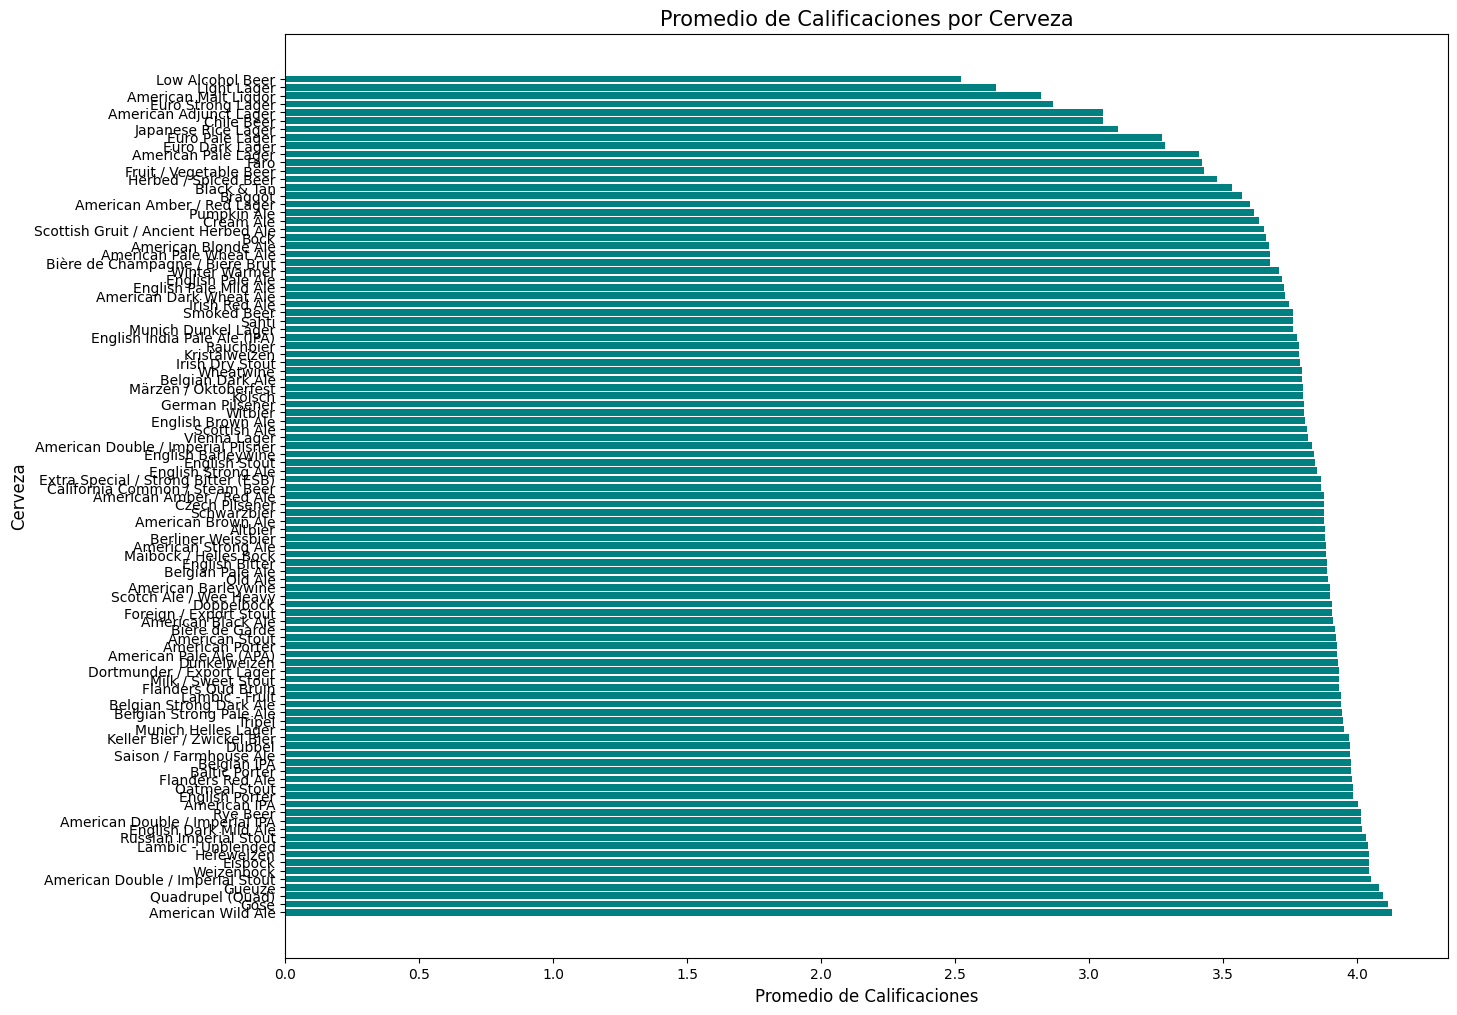

In [96]:
# Graficamos la variable media calificación por tipo de cerveza

# Ordenanos las cervezas por el promedio de calificación para una mejor visualización
media_calificaciones_por_producto = media_calificaciones_por_producto.sort_values(by = 'rating_promedio', ascending=False)

# Graficamos  tipo de cerveza vs promedio de calificación
plt.figure(figsize=(15, 12))
plt.barh(media_calificaciones_por_producto['beerStyle'], media_calificaciones_por_producto['rating_promedio'], color='teal')

plt.title('Promedio de Calificaciones por Cerveza', fontsize=15)
plt.xlabel('Promedio de Calificaciones', fontsize=12)
plt.ylabel('Cerveza', fontsize=12)

plt.show()

Debido a que existen muchas cervezas en el dataset, graficar el promedio de las calificaciones recibidas por cada una de ellas es un poco complicado, por lo que se optó por graficar la calificación promedio de los tipos de cervezas disponibles en el dataset.
De la gráfica vemos que el tipo de cerveza con menor valoración promedio es 'Low Alcohol Beer' con una calificación promedio de 2.6 aproximadamente, mientras que la categoría de cerveza mejor valorada es la 'American Wild Ale', con una calificación promedio de 4.3 aproximadamente.
Vemos además que varias cervezas tipo lager ocupan los últimos puestos en términos de calificación promedio

**2**

In [97]:
# Creamos la matriz de usuario-producto
matriz_usuario_producto = df.pivot_table(index='userId', columns='beerId', values='rating')

print(matriz_usuario_producto.head())

beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

***1***

In [98]:
#CODIGO AQUI
# Creamos el dataset sólo con características de las cervezas
df_bow = df.groupby('beerId')[['beerName', 'beerStyle']].first().reset_index()
df_bow

,beerId,beerName,beerStyle
0,5,Amber,Vienna Lager
1,6,Turbodog,English Brown Ale
2,7,Purple Haze,Fruit / Vegetable Beer
3,9,Golden,American Pale Lager
4,10,Allagash Dubbel Ale,Dubbel
...,...,...,...
3742,74827,Lips Of Faith - Fresh Hop India Pale Ale,American IPA
3743,74904,Allies Win The War!,English Strong Ale
3744,74986,Lagunitas Sucks Holiday Ale,American Double / Imperial IPA
3745,75013,Firestone 15 - Anniversary Ale,American Strong Ale


***2***

In [99]:
# Implementamos el método bag of words para la columna 'beerStyle'
vectorizer = CountVectorizer(lowercase = True, # transformación a minúsculas
                             min_df = 10, # mínimo 10 ocurrencias
                             stop_words = 'english') # eliminar stopwords
bow = vectorizer.fit_transform(df_bow['beerStyle']).toarray()
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***3***

In [100]:
# Calculamos la similitud coseno de cada vector generado contra el resto
cosine_sim = cosine_similarity(bow, bow)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.33333333,
        0.28867513],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.28867513,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.28867513, 1.        ,
        0.57735027],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.57735027,
        1.        ]])

In [101]:
# Definimos la función para recomendar las top 5 cervezas similares a Chocolate Porter
def get_recommendations(df, beer, k = 5):

  # Obtenemos el índice de la cerveza
  idx = df[df['beerName'] == beer].index[0]

  # Obtenemos pares de similitud de todas las cervezas con la cerveza especificada
  similar_scores = list(enumerate(cosine_sim[idx]))

  # Ordenamos las cervezas en función de su similitud
  similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

  # Obtenemos los scores para la k cervezas mas similares
  similar_scores = similar_scores[1:k+1]

  # Obtenemos los índices de las cervezas escogidas
  beer_indices = [i[0] for i in similar_scores]

  # Devolvemos las tp k cervezas más similares
  return df['beerName'].iloc[beer_indices].values

get_recommendations(df = df_bow, beer = 'Chocolate Porter')

array(['Blackhook Porter', 'Anchor Porter', 'Coffeehouse Porter',
       "Drayman's Porter", 'Stone Smoked Porter'], dtype=object)

***5***

In [102]:
# Encontramos la mejor cerveza evaluada por Homero

userId = 100
user_beers = df[df['userId'] == userId].sort_values('rating', ascending = False)
best_beer = user_beers.iloc[0]['beerName']
print(f'La cerveza mejor valorada por Homero: {best_beer}')

La cerveza mejor valorada por Homero: McNeill's Firehouse Amber Ale


In [103]:
# Luego, emcontramos las 5 cervezas más similares a esta, la cerveza mejor calificada por homero
get_recommendations(df = df_bow, beer = best_beer)

array(['Full Sail Amber', "McNeill's Firehouse Amber Ale", 'Grail Ale',
       'American Amber Ale', "Ruedrich's Red Seal Ale"], dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

***1***

In [127]:
#CODIGO AQUI
from surprise.model_selection import train_test_split
# Transformamos el DataFrame de pandas a Dataset de surprise
reader = Reader(rating_scale = (0, 5))

df_collaborative = df[['userId', 'beerId', 'rating']].copy() # No importa el orden de las características
dataset = Dataset.load_from_df(df_collaborative, reader) # Generamos Dataset de Surprise
dataset


# 2


#Generamos un conjunto de entrenamiento y de prueba, con el 30% de los datos destinados al conjunto de prueba
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 3380)
trainset

***3***

In [105]:
# Configuración de la similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': True  # True para  KNN basado en usuarios
}

# Entrenamos el modelo KNN basado en usuarios
knn_user = KNNBasic(sim_options=sim_options)

# Entrenamos el modelo en el conjunto de entrenamiento
knn_user.fit(trainset)

# Realizamos predicciones en el conjunto de prueba
predictions_user = knn_user.test(testset)

# Genramos el dataset con las predicciones
df_predictions = pd.DataFrame(predictions_user)
print(df_predictions.head())


#4


# Calculamos el MAE de las predicciones
print('MAE: ' + str(mae(predictions_user)))

Computing the cosine similarity matrix...
Done computing similarity matrix.
     uid    iid  r_ui       est                                    details
0    651  52043   3.5  3.807692  {'actual_k': 13, 'was_impossible': False}
1  10099   6260   5.0  3.850000  {'actual_k': 40, 'was_impossible': False}
2    140  37477   4.5  4.112500  {'actual_k': 40, 'was_impossible': False}
3    148  25989   5.0  3.837500  {'actual_k': 40, 'was_impossible': False}
4   1837   5245   4.0  3.966667  {'actual_k': 15, 'was_impossible': False}
MAE:  0.4652
MAE: 0.46520802143256357


***5***

In [106]:
# Repetimos el entrenamiento pero ahora para hacer KNN basdo en los productos

simi_options = {
    'name': 'cosine',
    'user_based': False  # False para  KNN basado en productos
}

# Entrenamos el modelo KNN basado en productos
knn_product = KNNBasic(sim_options=simi_options)

# Entrenamos el modelo en el conjunto de entrenamiento
knn_product.fit(trainset)

# Realizamos predicciones en el conjunto de prueba
predictions_product = knn_product.test(testset)

# Genramos el dataset con las predicciones
df_predictions_pr = pd.DataFrame(predictions_product)
print(df_predictions_pr.head())

# Calculamos el MAE de las predicciones
print('MAE: ' + str(mae(predictions_product)))




Computing the cosine similarity matrix...
Done computing similarity matrix.
     uid    iid  r_ui       est                                    details
0    651  52043   3.5  4.209859  {'actual_k': 40, 'was_impossible': False}
1  10099   6260   5.0  3.850000  {'actual_k': 40, 'was_impossible': False}
2    140  37477   4.5  4.112500  {'actual_k': 40, 'was_impossible': False}
3    148  25989   5.0  3.837500  {'actual_k': 40, 'was_impossible': False}
4   1837   5245   4.0  3.912769  {'actual_k': 40, 'was_impossible': False}
MAE:  0.4652
MAE: 0.46523121163672004


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

***1***

In [107]:
#CODIGO AQUI

model = NMF(random_state = 3380) # instanciamos modelo NMF (cambiar a modelo de preferencia)
model.fit(trainset) # fit del modelo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions_nmf = pd.DataFrame(predictions)
print(df_predictions_nmf.head())


#2


mae_nmf = mae(predictions)
# Calculamos el MAE de las predicciones
print('MAE: ' + str(mae_nmf))

     uid    iid  r_ui       est                    details
0    651  52043   3.5  3.705730  {'was_impossible': False}
1  10099   6260   5.0  3.919372  {'was_impossible': False}
2    140  37477   4.5  3.968601  {'was_impossible': False}
3    148  25989   5.0  3.694468  {'was_impossible': False}
4   1837   5245   4.0  4.005753  {'was_impossible': False}
MAE:  0.4806
MAE: 0.48059082033540695


***3***

In [108]:
from surprise import SVD

# Instanciamos el modelo SVD
model_svd = SVD(random_state=3380)

# Entrenamos el modelo en el conjunto de entrenamiento
model_svd.fit(trainset)

# Realizamos las predicciones en el conjunto de prueba
predictions_svd = model_svd.test(testset)

# Convertir las predicciones a un DataFrame
df_predictions_svd = pd.DataFrame(predictions_svd)
print(df_predictions_svd.head())


     uid    iid  r_ui       est                    details
0    651  52043   3.5  3.828563  {'was_impossible': False}
1  10099   6260   5.0  3.846123  {'was_impossible': False}
2    140  37477   4.5  4.103933  {'was_impossible': False}
3    148  25989   5.0  3.884248  {'was_impossible': False}
4   1837   5245   4.0  3.951498  {'was_impossible': False}


***4***

In [124]:
# Calcular el MAE para las predicciones del modelo SVD
mae_svd = mae(predictions_svd)
print('MAE: ' + str(mae_svd))

MAE:  0.4627
MAE: 0.46270782322252235


***5***

In [110]:
# Comparación de resultados
if mae_svd < mae_nmf:
    print("El modelo SVD tiene mejor rendimiento según MAE.")
else:
    print("El modelo NMF tiene mejor rendimiento según MAE.")


MAE del modelo NMF: 0.48059082033540695
MAE del modelo SVD: 0.46270782322252235
El modelo SVD tiene mejor rendimiento según MAE.


Al calcular la métrica MAE, para ambos modelos vemos claramente que el modelo SVD, posee un mejor rendimiento, es decir que ,  en promedio, las predicciones realizadas por el modelo SVD están más cerca de las calificaciones reales que las realizadas por el modelo NMF.Además, al correr el modelo, vemos que que el modelo NMF tiene peor rendimiento en términos de tiempo de tiempo de etrenamiento y predicción. Es por esto que podríamos considerar que el modelo SVD tiene un mejor rendimiento en general con respecto al NMF, sin embargo, también se podría incluir en este análisis métricas como precision y recall

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [111]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

***#1***

In [112]:
#CODIGO AQUI

from collections import defaultdict

def get_top_n(predictions, n=10):

    # Mapeamos predicciones para cada usuario
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenamos las predicciones hechas para cada usuario y rescatamos las k mejores
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Utilizamos las predicciones hechas por el mejor modelo seleccionado en la parte anterior
top_n_recommendations = get_top_n(predictions, n = 3)



***#2***

In [113]:
# Filtramos las recomendaciones para Homero
homero_recommendations = top_n_recommendations.get(100, [])

# Eliminamos duplicados usando un diccionario, que preserva solo las primeras entradas únicas
unique_recommendations = {}
for beer_id, rating in homero_recommendations:
    if beer_id not in unique_recommendations:
        unique_recommendations[beer_id] = rating

# Ordenamos las recomendaciones por rating estimado y seleccionamos las 3 mejores
top_3_homero = sorted(unique_recommendations.items(), key=lambda x: x[1], reverse=True)[:3]

print(top_3_homero)


[(325, 4.020833016477663)]


In [125]:
# Primero separamos los (usuario, producto) con ratings
full_trainset = dataset.build_full_trainset()

# Generamos el conjunto de predicciones para los valores sin calificación
missing_ratings = full_trainset.build_anti_testset()

# Filtramos las predicciones solo para Homero
homero_missing_ratings = [(uid, iid, true_r) for uid, iid, true_r in missing_ratings if uid == 100]

# Obtenemos las predicciones para las cervezas no evaluadas por Homero
predicted_ratings = model.test(homero_missing_ratings)

# Seleccionamos 5 cervezas aleatorias de las predicciones (5 primera en este caso)
random_5_predictions = predicted_ratings[:5]

print("Cinco cervezas aleatorias no evaluadas por Homero y sus calificaciones predichas:")
for uid, iid, true_r, est, _ in random_5_predictions:
    print(f"Cerveza: {iid}, Calificación Predicha: {est:}")


Cinco cervezas aleatorias no evaluadas por Homero y sus calificaciones predichas:
Cerveza: 995, Calificación Predicha: 3.068184106732397
Cerveza: 58695, Calificación Predicha: 2.917344729971103
Cerveza: 4083, Calificación Predicha: 3.495235074714287
Cerveza: 40310, Calificación Predicha: 2.4577632177684325
Cerveza: 1904, Calificación Predicha: 3.5557083566191943


In [115]:
# Calculamos los promedios de precisión y recall
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)

# Calcular los promedios
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Promedio de precisión@10: {avg_precision}")
print(f"Promedio de recall@10: {avg_recall}")



Promedio de precisión@10: 0.7313340303071165
Promedio de recall@10: 0.3286884051716432


A partir de estos resultados podemos interpretar que el modelo esta priorizando la calidad de las recomendaciones (precisión relativamente alto), pero no está recuperando todas las opciones relevantes para el usuario(recall bajo). Es decir, el modelo esta recomendando solo las cervezas que está muy seguro que serán de alta calidad, pero deja de lado algunas cervezas que podrían ser relevantes. Luego, podemos decir que el modelo tiene un buen rendimiento.

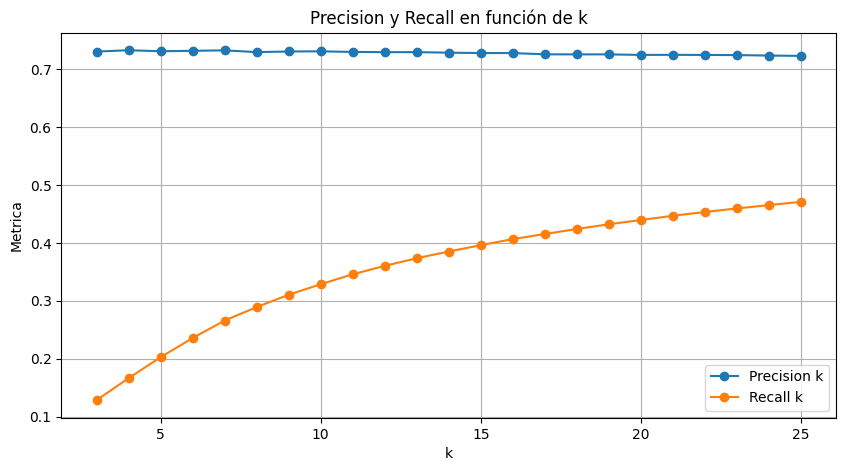

In [116]:
# Calculamos la precisión y recall para diferentes valores de k
k_values = range(3, 26)
precision_k = []
recall_k = []

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
    precision_k.append(np.mean(list(precisions.values())))
    recall_k.append(np.mean(list(recalls.values())))

# Graficamos precisión y recall en función de k
plt.figure(figsize=(10, 5))
plt.plot(k_values, precision_k, label='Precision k', marker='o')
plt.plot(k_values, recall_k, label='Recall k', marker='o')
plt.title('Precision y Recall en función de k')
plt.xlabel('k')
plt.ylabel('Metrica')
plt.legend()
plt.grid(True)
plt.show()

De la gráfica, notamos que el Recall del modelo aumenta a medida que aumentamos 'k', es decir, la cantidad de recomendaciones por usuarios. Mientras que la Precision se mantiene constante a medida que aumenta este parámetro 'k'. Por lo tanto, considerando estas métricas, el modelo tendría un mejor desempeño considerando un valor de k más alto

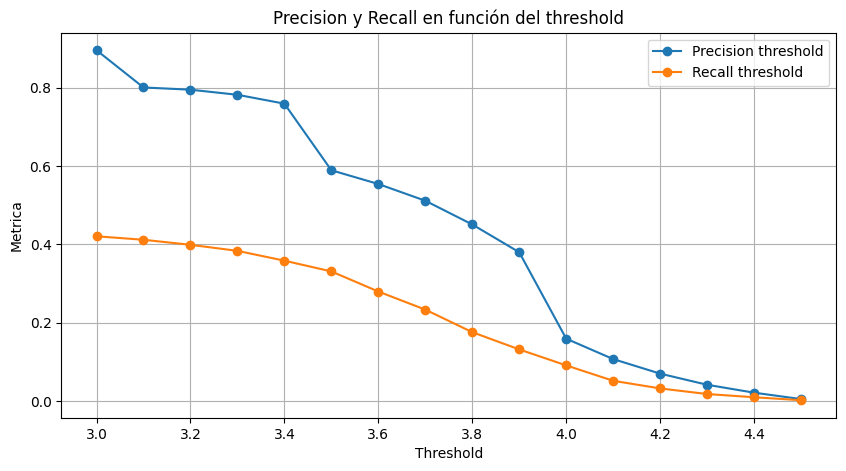

In [117]:
# Calculamos precisión y recall para diferentes valores de threshold
threshold_values = np.arange(3.0, 4.6, 0.1)
precision_threshold = []
recall_threshold = []

for threshold in threshold_values:
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=threshold)
    precision_threshold.append(np.mean(list(precisions.values())))
    recall_threshold.append(np.mean(list(recalls.values())))

# Graficamos precisión y recall en función del threshold
plt.figure(figsize=(10, 5))
plt.plot(threshold_values, precision_threshold, label='Precision threshold', marker='o')
plt.plot(threshold_values, recall_threshold, label='Recall threshold', marker='o')
plt.title('Precision y Recall en función del threshold')
plt.xlabel('Threshold')
plt.ylabel('Metrica')
plt.legend()
plt.grid(True)
plt.show()

De la gráfica notamos que tanto el recall como la precision del modelo disminuyen a medida que el treshold aumenta, es decir, mientras más grande el umbral que define si una recomendación es "buena" o "relevante", es decir, mientras mayor sea la exigencia del modelo para considerar una predicción como acertada, el desempeño del modelo es peor al considerar estas métricas.

In [118]:
# Creamos una matriz de usuario-producto sin valores nulos
ratings_matrix = df.pivot_table(index='userId', columns='beerId', values='rating')

# Estimamos los ratings faltantes con el mejor modelo
for user in ratings_matrix.index:
    for beer in ratings_matrix.columns:
        if pd.isna(ratings_matrix.at[user, beer]):
            pred = model.predict(user, beer)
            ratings_matrix.at[user, beer] = pred.est

print(ratings_matrix)


beerId     5         6         7         9         10        11        14     \
userId                                                                         
1       2.201648  2.347139  2.100484  2.004684  2.267233  2.030072  3.207647   
3       3.395000  3.765217  3.256849  3.478261  2.637496  2.834285  3.081934   
4       2.646427  3.280695  2.693223  3.327762  3.791908  3.302800  3.384009   
5       2.834163  3.192506  2.624579  3.266395  3.365606  3.431818  3.180935   
6       2.724307  3.066325  2.615849  2.845848  2.740519  2.596491  3.892157   
...          ...       ...       ...       ...       ...       ...       ...   
24903   2.301188  2.601516  1.943927  2.615424  3.350546  2.841242  2.946080   
25317   2.310170  2.787488  2.252408  2.599222  2.982061  2.570329  3.160663   
25923   2.919140  3.007249  2.665040  2.695212  2.351248  2.586078  3.231124   
27039   3.091894  3.328234  3.118383  3.405042  3.297985  3.233451  3.444058   
27681   2.236160  2.512689  2.275619  2.